In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, recall_score, precision_score, f1_score

In [2]:
# Specify file path using a raw string literal
file_path = r'C:\Users\USER\Desktop\Student_Performance\StudentsPerformance.csv'

# Load CSV file into DataFrame
data = pd.read_csv(file_path)

# Display first few rows of the DataFrame
data.head(25)





,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
file_path = 'C:\\Users\\USER\\Desktop\\Student_Performance\\StudentsPerformance.csv'
data = pd.read_csv(file_path)


In [4]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

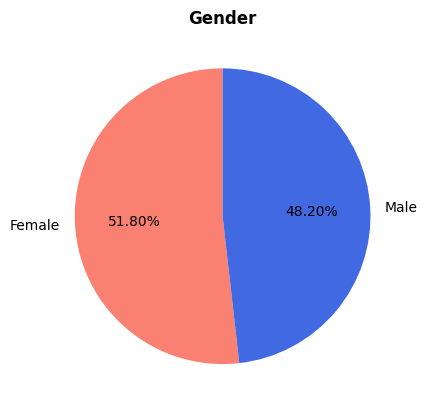

In [10]:
# gender pie Visualization
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = 'salmon', 'royalblue'
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Gender', fontweight='bold')
plt.show()

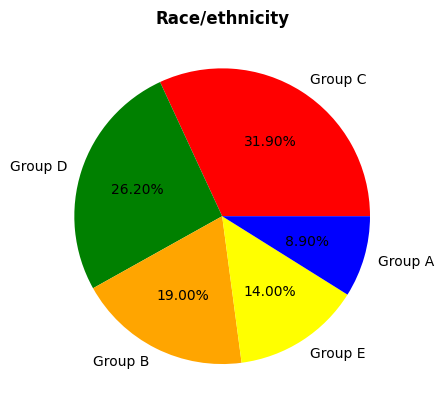

In [11]:
# race ethnicity pie
size  = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = 'red', 'green', 'orange', 'yellow', 'blue'
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Race/ethnicity', fontweight='bold')
plt.show()

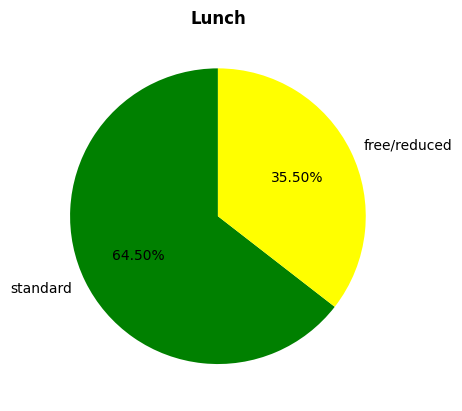

In [12]:
# lunch pie
size = data['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = 'green', 'yellow'
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Lunch', fontweight='bold')
plt.show()

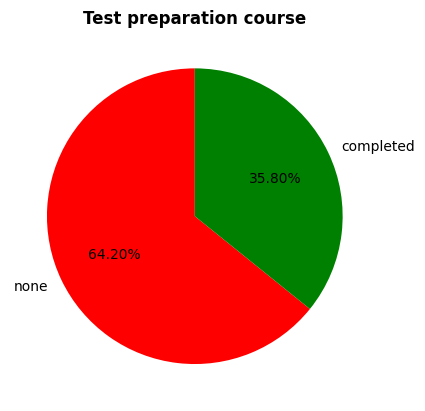

In [13]:
# test course pie
size = data['test preparation course'].value_counts()
labels = 'none', 'completed'
color = 'red', 'green'
plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Test preparation course', fontweight='bold')
plt.show()

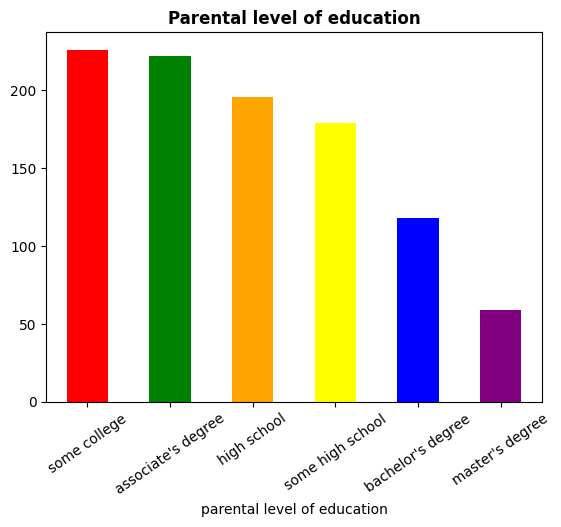

In [14]:
# parental level of education
data['parental level of education'].value_counts().plot(kind='bar', color=['red', 'green', 'orange', 'yellow', 'blue', 'purple'])
plt.title('Parental level of education', fontweight='bold')
plt.xticks(rotation=35)

plt.show()

In [15]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
print("Average math score is : {}".format(np.mean(data['math score'])))
print("Average reading score is : {}".format(np.mean(data['reading score'])))
print("Average writing score is : {}".format(np.mean(data['writing score'])))
print("Average score is : {}".format(np.mean(data['total score'] / 3)))

Average math score is : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average score is : 67.77066666666666


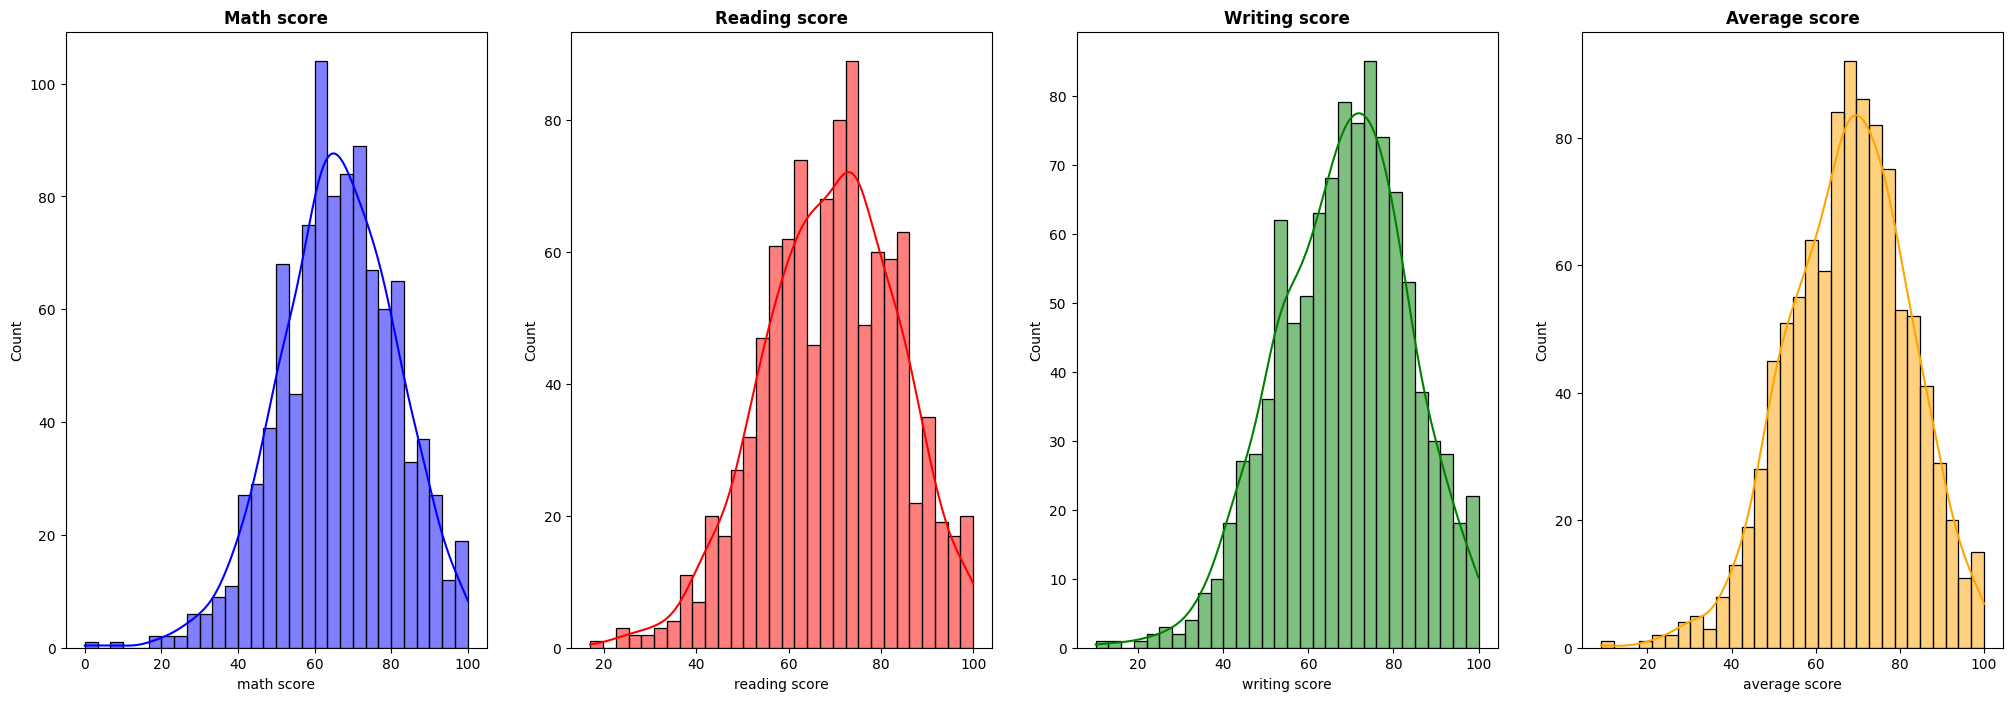

In [16]:
# score distribution
fig, ax = plt.subplots(1, 4, figsize=(25, 8))

ax[0].set_title('Math score', fontweight='bold')
sns.histplot(data=data, x='math score', bins=30, kde=True, color='blue', ax=ax[0])

ax[1].set_title('Reading score', fontweight='bold')
sns.histplot(data=data, x='reading score', bins=30, kde=True, color='red', ax=ax[1])

ax[2].set_title('Writing score', fontweight='bold')
sns.histplot(data=data, x='writing score', bins=30, kde=True, color='green', ax=ax[2])

data['average score'] = data['total score'] / 3
ax[3].set_title('Average score', fontweight='bold')
sns.histplot(data=data, x='average score', bins=30, kde=True, color='orange', ax=ax[3])

plt.show()

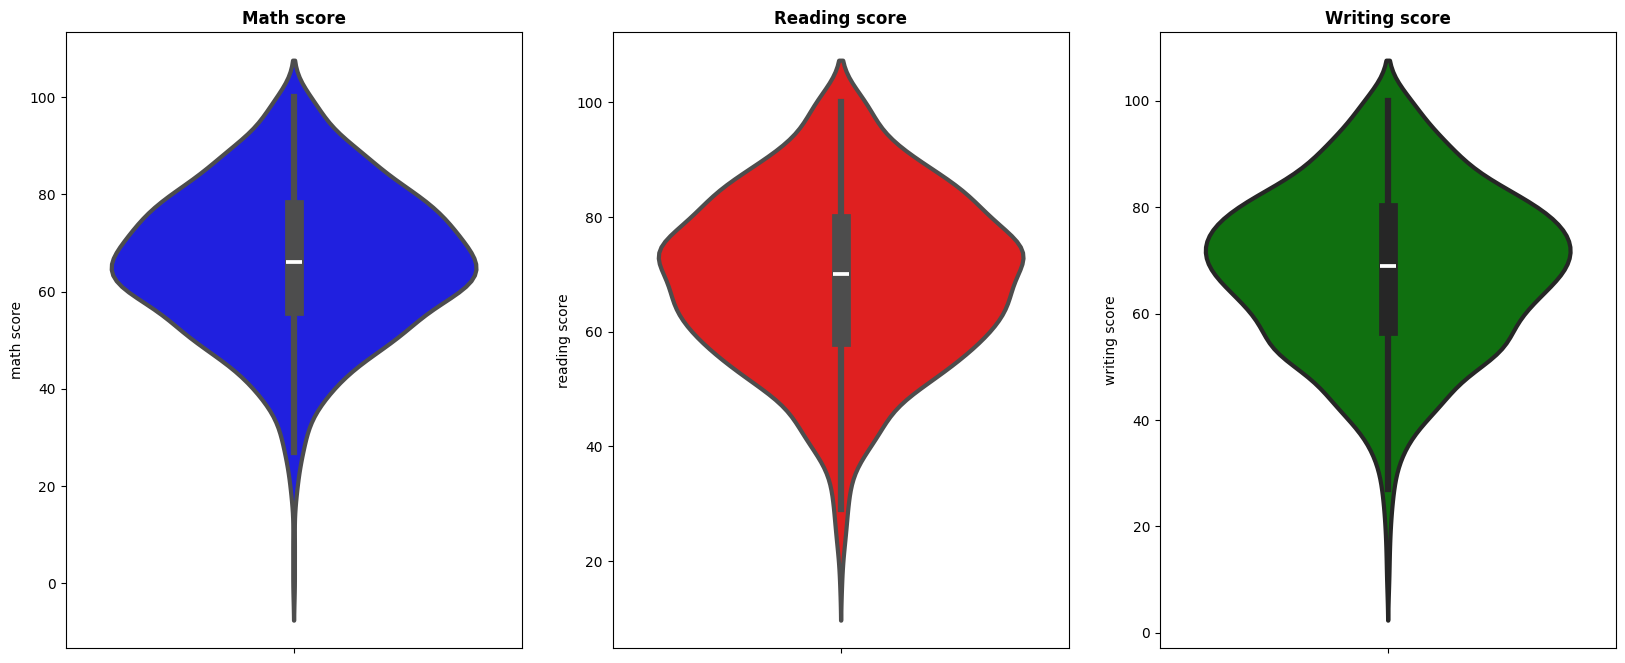

In [17]:
# Max score of students (data)
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
ax[0].set_title('Math score', fontweight='bold')
sns.violinplot(y='math score', data=data, color='blue', linewidth=3, ax=ax[0])

ax[1].set_title('Reading score', fontweight='bold')
sns.violinplot(y='reading score', data=data, color='red', linewidth=3, ax=ax[1])

ax[2].set_title('Writing score', fontweight='bold')
sns.violinplot(y='writing score', data=data, color='green', linewidth=3, ax=ax[2])

plt.show()

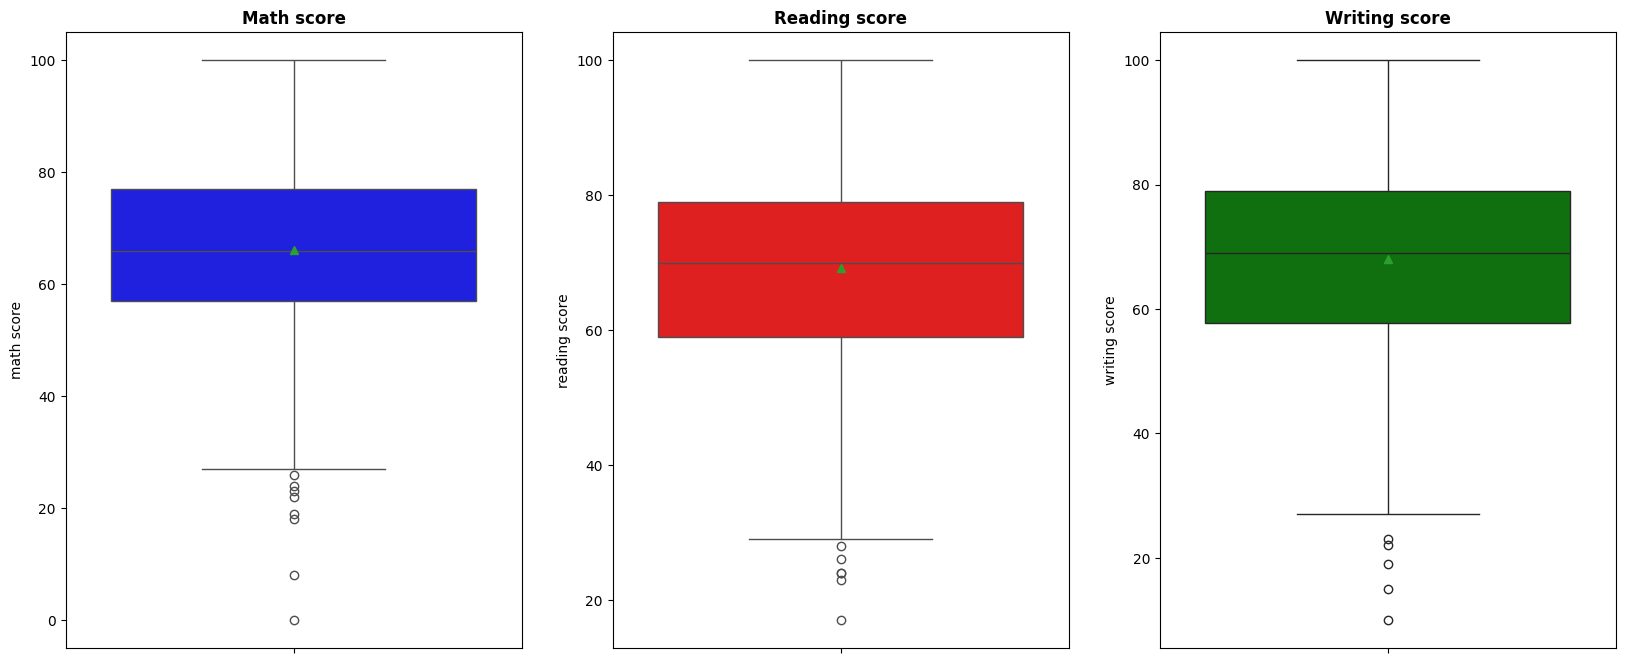

In [18]:
# Outliers
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
ax[0].set_title('Math score', fontweight='bold')
sns.boxplot(data=data, y='math score', showmeans=True, color='blue', ax=ax[0])

ax[1].set_title('Reading score', fontweight='bold')
sns.boxplot(data=data, y='reading score', showmeans=True, color='red', ax=ax[1])

ax[2].set_title('Writing score', fontweight='bold')
sns.boxplot(data=data, y='writing score', showmeans=True, color='green', ax=ax[2])

plt.show()

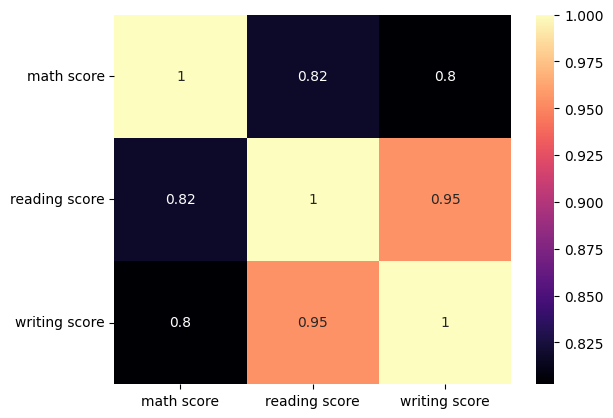

In [19]:
# correlation
sns.heatmap(data[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='magma')
plt.yticks(rotation=0)
plt.show()

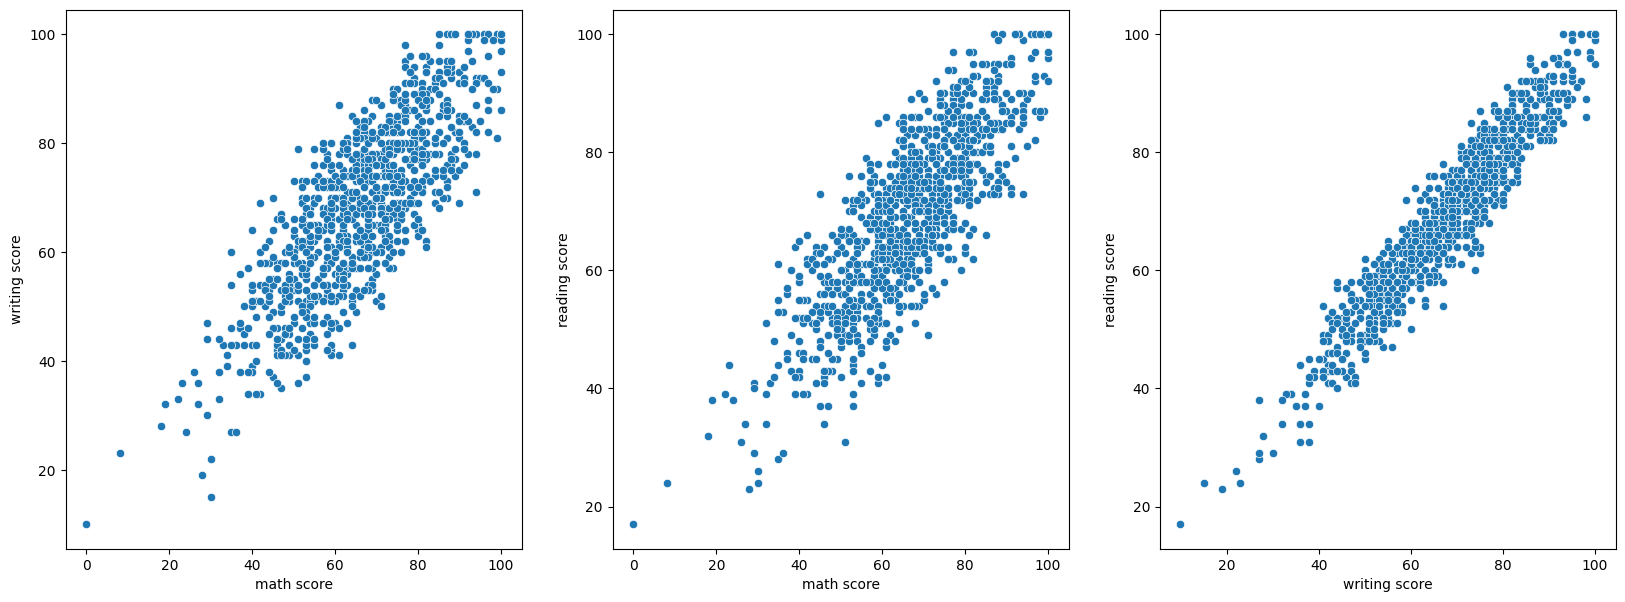

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

sns.scatterplot(data=data, x='math score', y='writing score', ax=ax[0])
sns.scatterplot(data=data, x='math score', y='reading score', ax=ax[1])
sns.scatterplot(data=data, x='writing score', y='reading score', ax=ax[2])

plt.show()

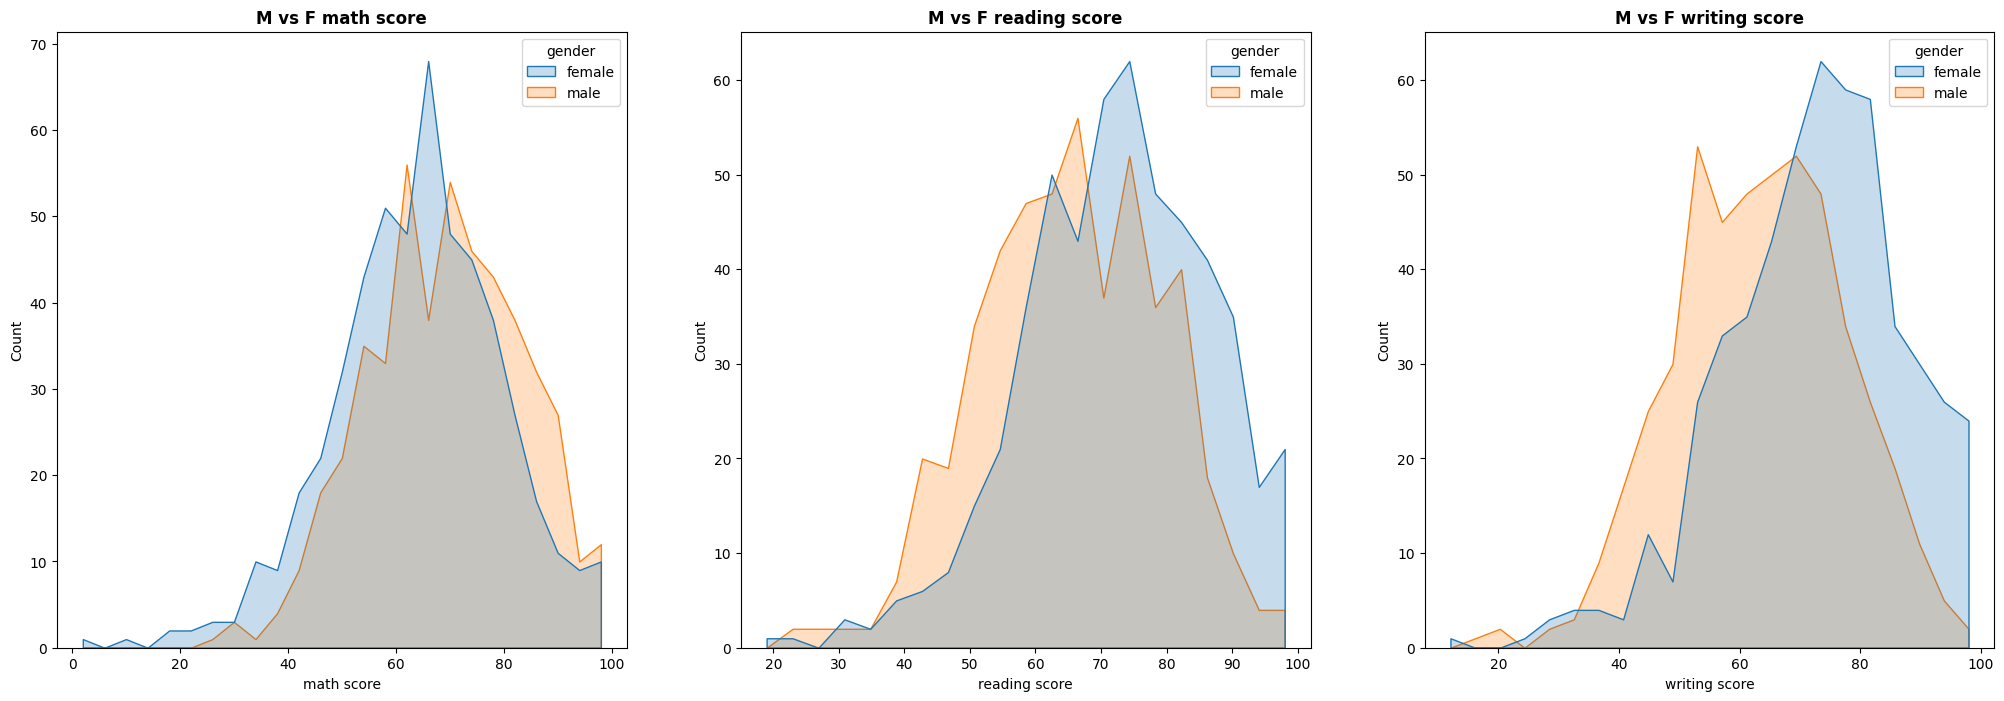

In [21]:
#race/ethnicity vs exam score

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
ax[0].set_title('M vs F math score', fontweight='bold')
sns.histplot(data, x='math score', ax=ax[0], hue='gender', element='poly')

ax[1].set_title('M vs F reading score', fontweight='bold')
sns.histplot(data, x='reading score', ax=ax[1], hue='gender', element='poly')

ax[2].set_title('M vs F writing score', fontweight='bold')
sns.histplot(data, x='writing score', ax=ax[2], hue='gender', element='poly')

plt.show()

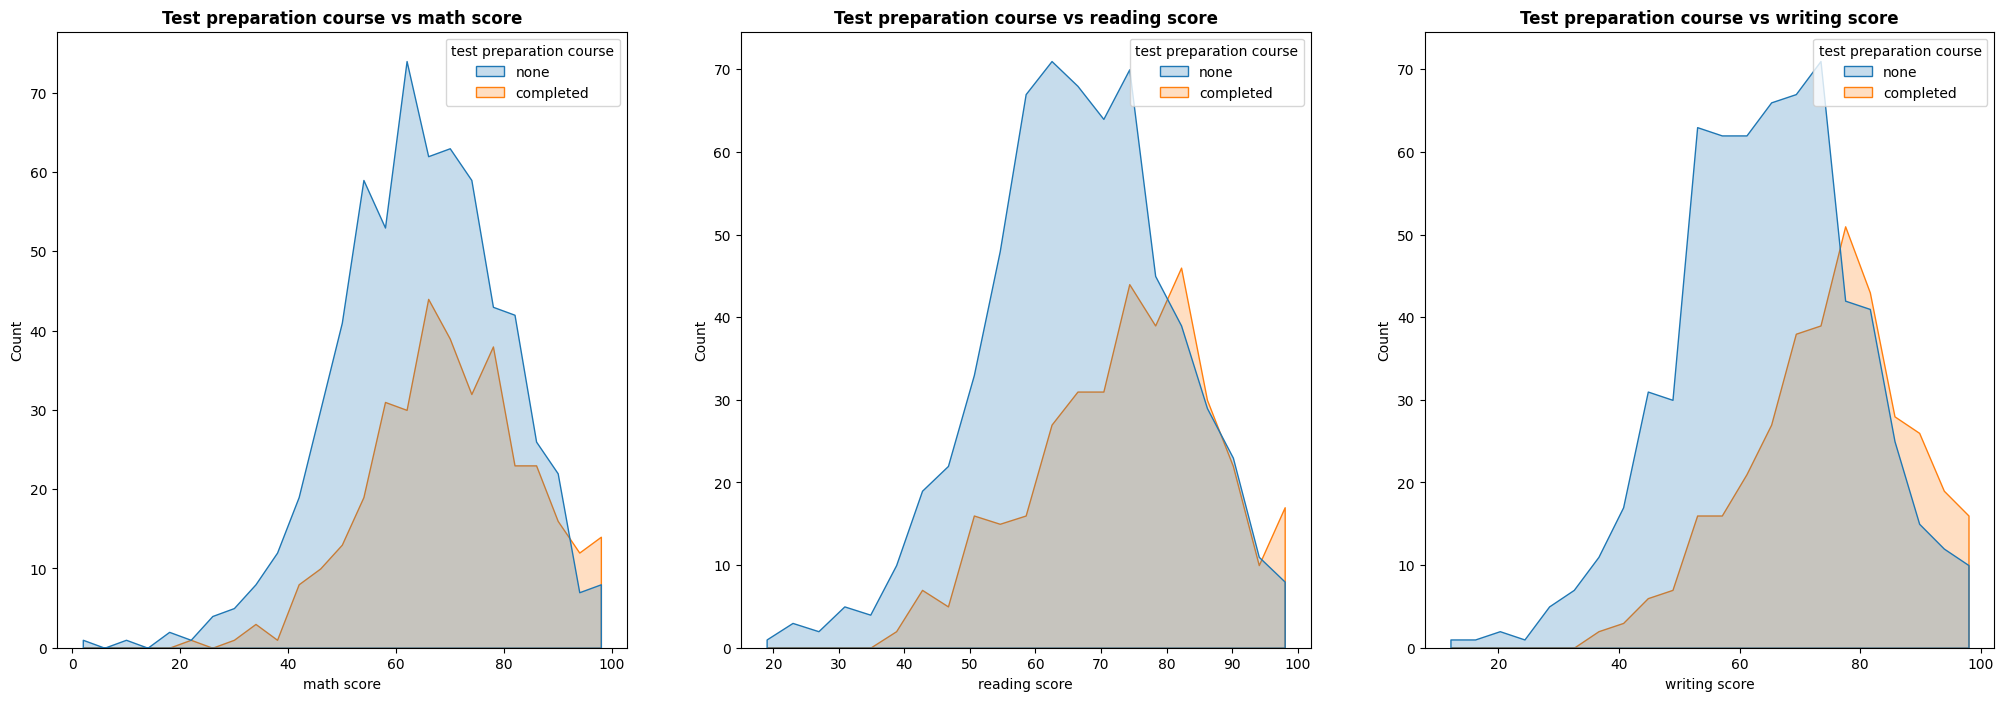

In [22]:
#Test prep cource vs exam score

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
ax[0].set_title('Test preparation course vs math score', fontweight='bold')
sns.histplot(data, x='math score', ax=ax[0], hue='test preparation course', element='poly')

ax[1].set_title('Test preparation course vs reading score', fontweight='bold')
sns.histplot(data, x='reading score', ax=ax[1], hue='test preparation course', element='poly')

ax[2].set_title('Test preparation course vs writing score', fontweight='bold')
sns.histplot(data, x='writing score', ax=ax[2], hue='test preparation course', element='poly')

plt.show()

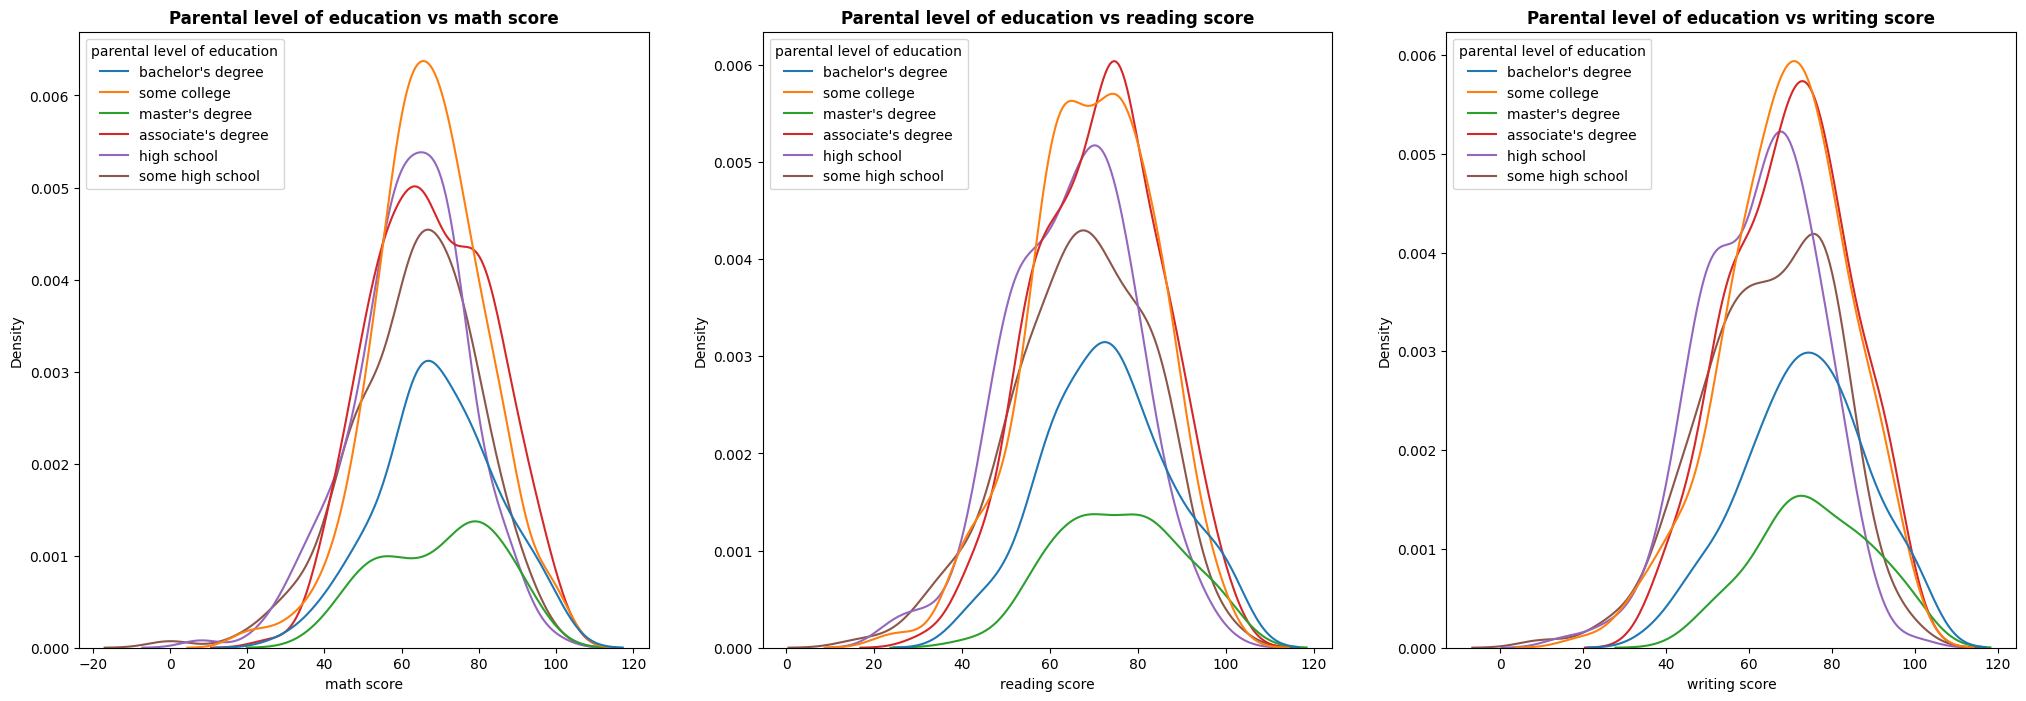

In [23]:
#parentl level of education vs exam score

fig, ax = plt.subplots(1, 3, figsize=(25, 8))
ax[0].set_title('Parental level of education vs math score', fontweight='bold')
sns.kdeplot(data=data, x='math score', hue='parental level of education', ax=ax[0])

ax[1].set_title('Parental level of education vs reading score', fontweight='bold')
sns.kdeplot(data=data, x='reading score', hue='parental level of education', ax=ax[1])

ax[2].set_title('Parental level of education vs writing score', fontweight='bold')
sns.kdeplot(data=data, x='writing score', hue='parental level of education', ax=ax[2])
plt.show()

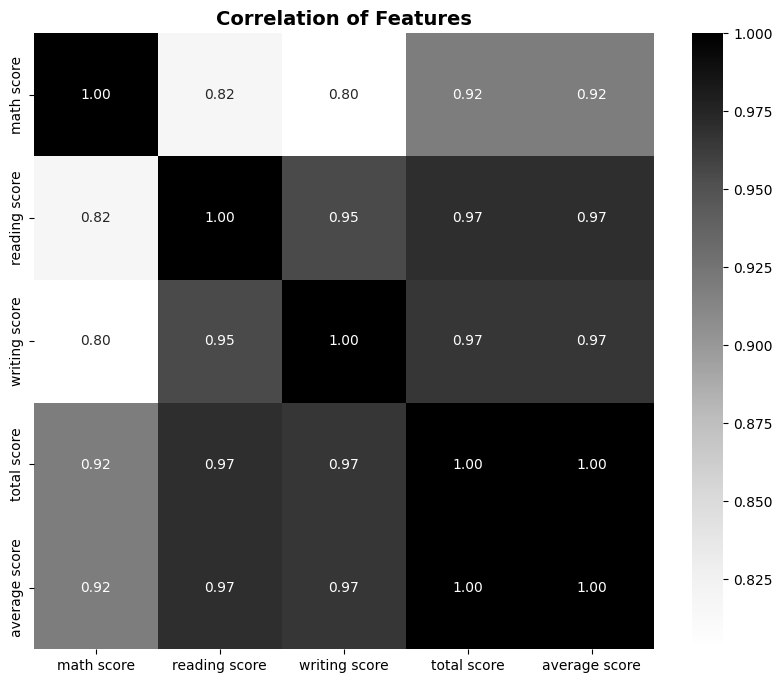

In [24]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
corr = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Grays', fmt=".2f")
plt.title('Correlation of Features', fontsize=14, fontweight='bold')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
columns = ["none", "completed"]
data["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [27]:
n_sample = 358
col_types = data["test preparation course"]
random_samples = {}
for col in columns:
    random_index = np.random.choice(data[col_types == col].index, size=n_sample, replace=False)
    random_samples[col] = data.iloc[random_index]

In [28]:
data_balanced = pd.concat(random_samples.values(), ignore_index=True)

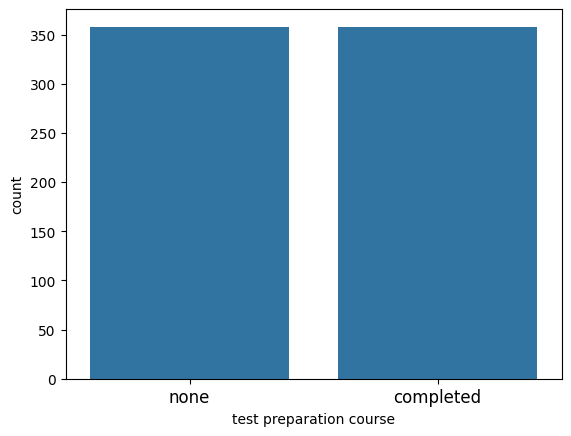

In [29]:
sns.countplot(data=data_balanced, x="test preparation course")
plt.xticks(horizontalalignment = 'center', fontweight = "light", fontsize = "large")
plt.show()

In [30]:
X = data_balanced.drop(['test preparation course'], axis=1)
y = data_balanced['test preparation course']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
math score                       int64
reading score                    int64
writing score                    int64
total score                      int64
average score                  float64
dtype: object

In [32]:
num_variables = [col for col in X_train.columns if X_train[col].dtypes != object]
encoder = ce.OrdinalEncoder(cols = [col for col in X_train.columns if X_train[col].dtypes == object])
sc_x = StandardScaler()

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

numeric_scaler_train = sc_x.fit_transform(X_train[num_variables].values)
numeric_scaler_test = sc_x.fit_transform(X_test[num_variables].values)

for idx, feature in enumerate(num_variables):
    X_train[feature] = numeric_scaler_train[:, idx]
    X_test[feature] = numeric_scaler_test[:, idx]

In [33]:
X_train.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total score,average score
56,1,1,1,1,-0.435792,-0.772776,-1.023554,-0.780776,-0.780776
204,2,2,2,1,1.196004,0.937593,0.825447,1.038670,1.038670
319,1,3,3,1,-0.501064,-1.251679,-1.551840,-1.153996,-1.153996
529,1,3,4,1,1.326548,0.937593,1.155626,1.201953,1.201953
24,2,4,3,2,-1.871774,-0.704361,-1.287697,-1.363932,-1.363932


In [34]:


tree = DecisionTreeClassifier(max_depth = 12, random_state = 42)
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [35]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Train accuracy:', np.round(train_accuracy_tree, 4))
print('Test accuracy:', np.round(test_accuracy_tree, 4))

report_dt = classification_report(y_test, y_test_pred_tree)
print("Classification Report: \n", report_dt)

Train accuracy: 0.986
Test accuracy: 0.5069
Classification Report: 
               precision    recall  f1-score   support

   completed       0.47      0.61      0.53        66
        none       0.56      0.42      0.48        78

    accuracy                           0.51       144
   macro avg       0.51      0.51      0.51       144
weighted avg       0.52      0.51      0.50       144



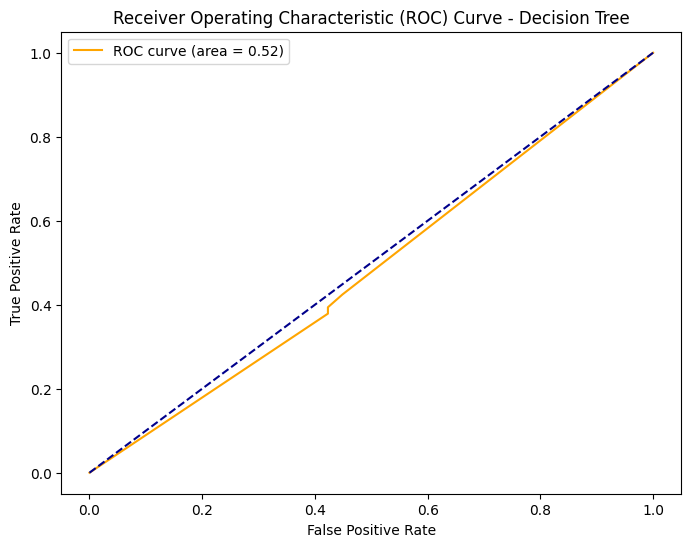

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'completed' is the positive class
pos_label = 'completed'

# Get the probability estimates for the positive class
y_probs_dt = tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, y_probs_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

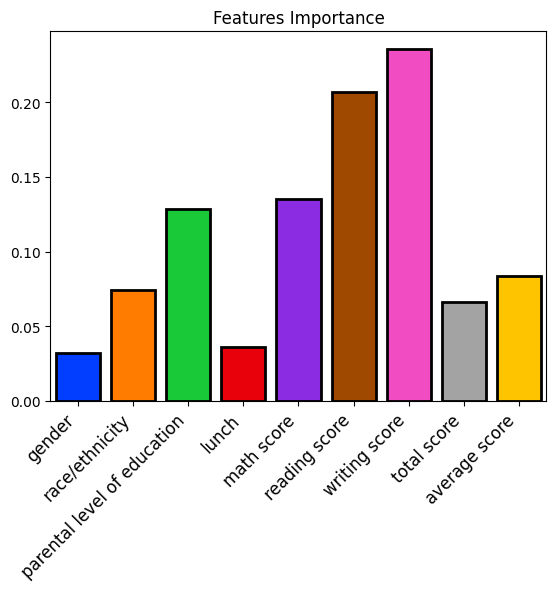

In [37]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
df_plot = pd.DataFrame(np.array([importances]), columns = columns)


sns.barplot(data=df_plot, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.xticks(rotation=45, horizontalalignment='right', fontweight="light", fontsize="large")
plt.title('Features Importance')
plt.show()

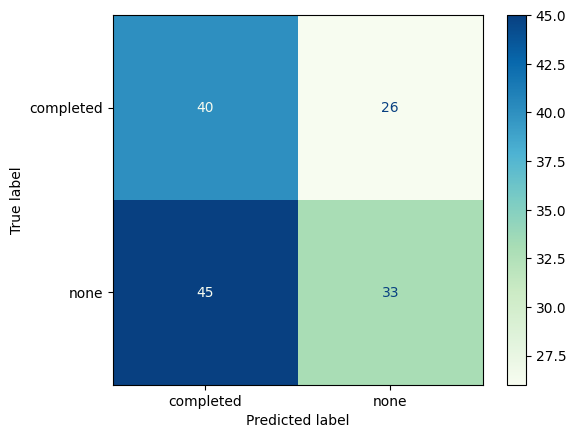

In [38]:
cm = confusion_matrix(y_test, y_test_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap="GnBu")
plt.show()

In [39]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [40]:

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Train accuracy:', np.round(train_accuracy_rf,4))
print('Test accuracy:', np.round(test_accuracy_rf,4))

report_rf = classification_report(y_test, y_test_pred_rf)
print("Classification Report: \n", report_rf)

Train accuracy: 0.9913
Test accuracy: 0.5556
Classification Report: 
               precision    recall  f1-score   support

   completed       0.51      0.65      0.57        66
        none       0.62      0.47      0.54        78

    accuracy                           0.56       144
   macro avg       0.56      0.56      0.55       144
weighted avg       0.57      0.56      0.55       144



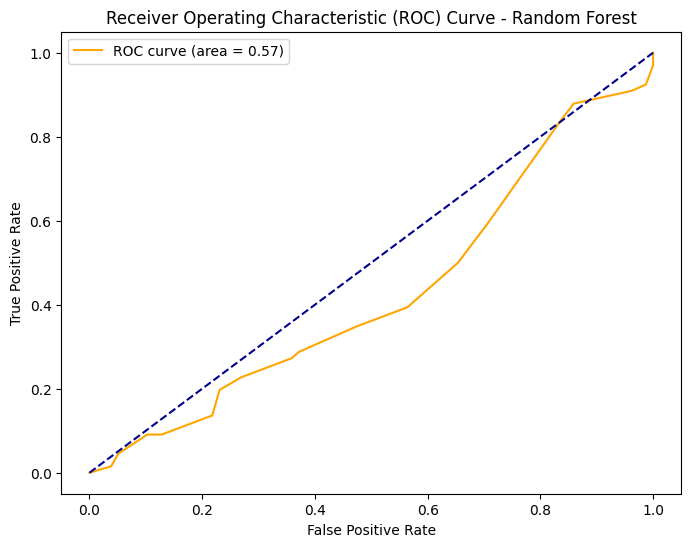

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'completed' is the positive class
pos_label = 'completed'

# Get the probability estimates for the positive class
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, y_probs_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

In [42]:
feature_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_scores

writing score                  0.197292
total score                    0.168548
reading score                  0.148193
math score                     0.146082
average score                  0.134318
parental level of education    0.090896
race/ethnicity                 0.060487
gender                         0.030486
lunch                          0.023699
dtype: float64

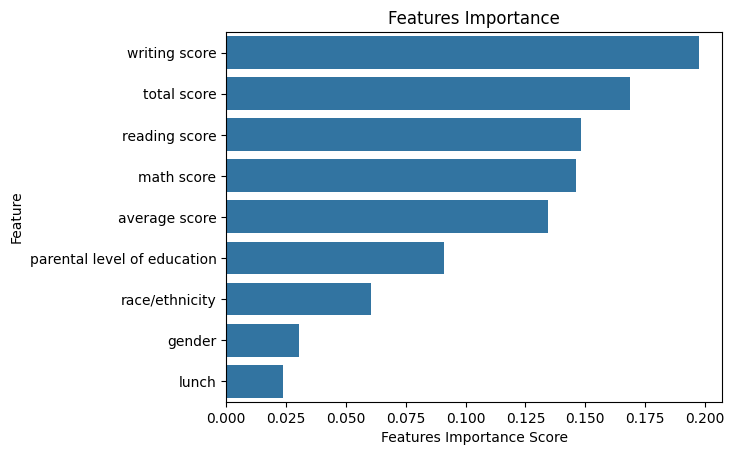

In [43]:
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Features Importance Score")
plt.ylabel("Feature")
plt.title("Features Importance")
plt.show()

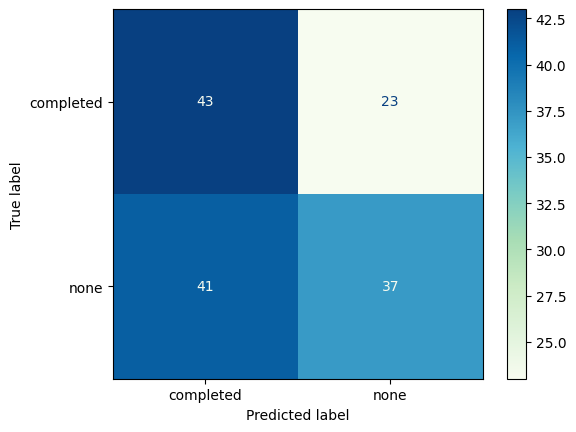

In [44]:
cm = confusion_matrix(y_test, y_test_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="GnBu")
plt.show()

In [45]:
select_cols = ["writing score", "math score", "reading score"]
X = data_balanced.drop([col for col in data_balanced.columns if col not in select_cols], axis = 1)
y = data_balanced['test preparation course']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
num_variables = ["writing score", "math score", "reading score"]

sc_x = StandardScaler()


numeric_scaler_train = sc_x.fit_transform(X_train[num_variables].values)
numeric_scaler_test = sc_x.fit_transform(X_test[num_variables].values)

for idx, feature in enumerate(num_variables):
    X_train[feature] = numeric_scaler_train[:, idx]
    X_test[feature] = numeric_scaler_test[:, idx]
    
rf = RandomForestClassifier(n_estimators = 150, max_depth = 5, min_samples_leaf = 3, min_samples_split= 3, random_state = 42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)


In [47]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)


print('Train accuracy:', np.round(train_accuracy_rf, 4))
print('Test accuracy:', np.round(test_accuracy_rf, 4))

Train accuracy: 0.7273
Test accuracy: 0.5486


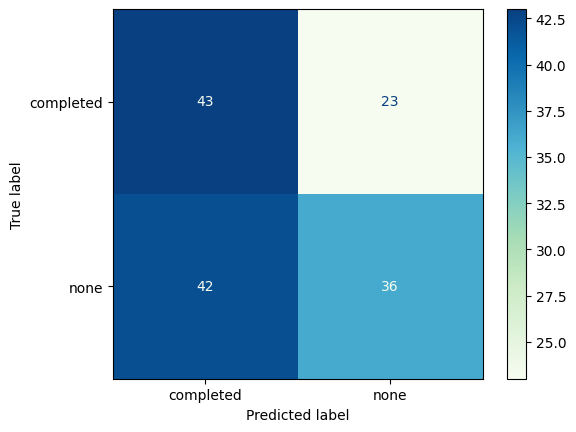

In [48]:
cm = confusion_matrix(y_test, y_test_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="GnBu")
plt.show()

In [49]:
#Finally, as we can see, we can improve the behavior of the model by adjusting the 
#features that have greater weight and discarding those that do not, the confusion 
#matrix is a good tool to check the performance of our model. When using random 
#forest we can adjust the parameters of max_depth, min_samples_leaf and min_samples_split to avoid overfitting and thus obtain more stable models

#Decision trees are a good tool if you need a quick and simple model, on the other hand, a random forest is a more 
#robust and precise model, but you must always keep in mind that it tends to overfit easily

In [50]:
# Model Training


naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [51]:
# Make predictions on the validation set
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the performance of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
accuracy_nb_percentage = accuracy_nb * 100
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb_percentage))

report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report: \n", report_nb)

Naive Bayes Accuracy: 0.6111111111111112
Naive Bayes Accuracy: 61.11%
Classification Report: 
               precision    recall  f1-score   support

   completed       0.56      0.73      0.63        66
        none       0.69      0.51      0.59        78

    accuracy                           0.61       144
   macro avg       0.62      0.62      0.61       144
weighted avg       0.63      0.61      0.61       144



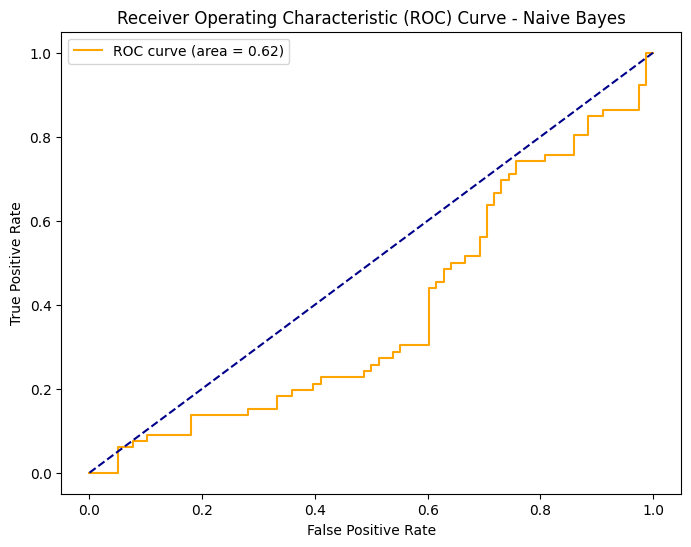

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'completed' is the positive class
pos_label = 'completed'

# Get the probability estimates for the positive class
y_probs_nb = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nb, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, y_probs_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend()
plt.show()

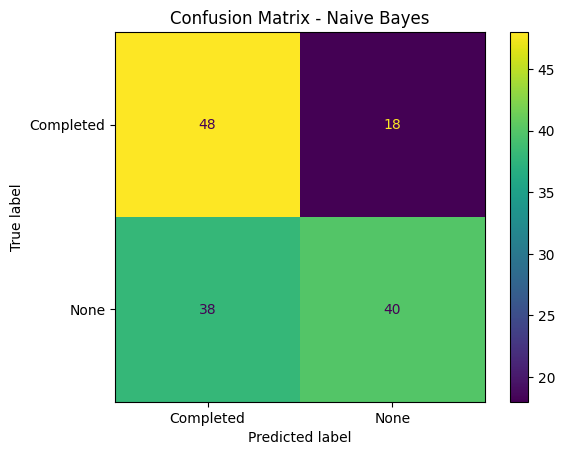

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Completed', 'None'])
disp.plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [54]:
print('Overfitting and Underfitting Check Naive Bayes')
print('Training set score: {:.4f}'.format(naive_bayes.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(naive_bayes.score(X_test, y_test)))

Overfitting and Underfitting Check Naive Bayes
Training set score: 0.6189
Test set score: 0.6111


In [55]:
# Model Training
svc_model = SVC(kernel = 'linear', probability = True)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [56]:
# Model Evaluation
# Model Evaluation
y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)  # Corrected variable name
print("SVC Accuracy:", accuracy_svc)
accuracy_svc_percentage = accuracy_svc * 100
print("SVC Accuracy: {:.2f}%".format(accuracy_svc_percentage))

report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report: \n", report_svc)

SVC Accuracy: 0.6111111111111112
SVC Accuracy: 61.11%
Classification Report: 
               precision    recall  f1-score   support

   completed       0.57      0.64      0.60        66
        none       0.66      0.59      0.62        78

    accuracy                           0.61       144
   macro avg       0.61      0.61      0.61       144
weighted avg       0.62      0.61      0.61       144



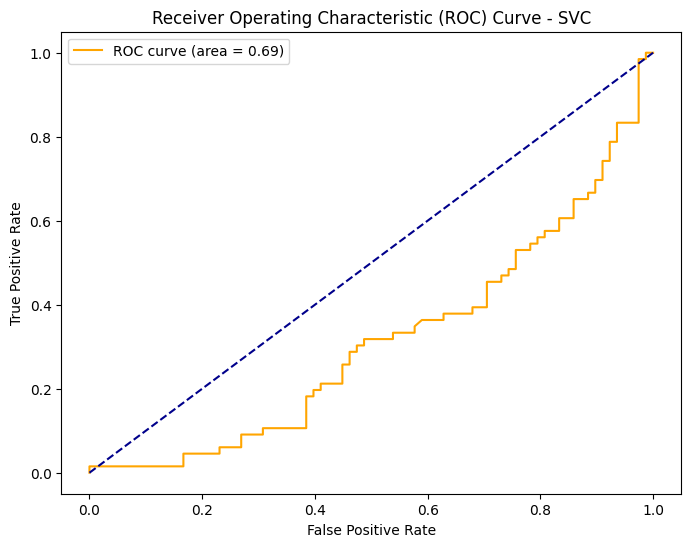

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'completed' is the positive class
pos_label = 'completed'

# Get the probability estimates for the positive class
y_probs_svc = svc_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svc, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, y_probs_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend()
plt.show()

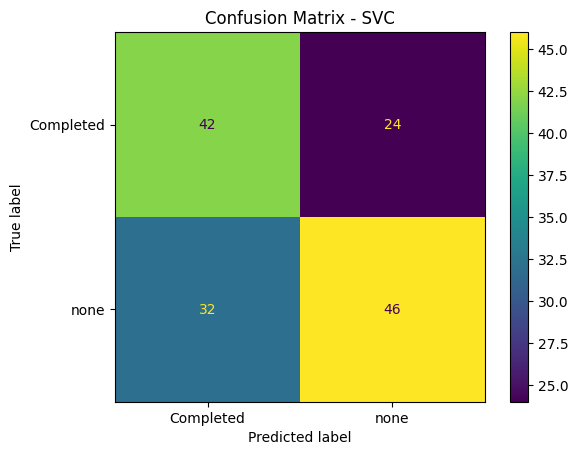

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Completed', 'none'])
disp.plot()
plt.title("Confusion Matrix - SVC")
plt.show()

In [59]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# Model Evaluation
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
accuracy_knn_percentage = accuracy_knn * 100
print("KNN Accuracy: {:.2f}%".format(accuracy_knn_percentage))

report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report: \n", report_knn)

KNN Accuracy: 0.5347222222222222
KNN Accuracy: 53.47%
Classification Report: 
               precision    recall  f1-score   support

   completed       0.49      0.56      0.52        66
        none       0.58      0.51      0.54        78

    accuracy                           0.53       144
   macro avg       0.54      0.54      0.53       144
weighted avg       0.54      0.53      0.54       144



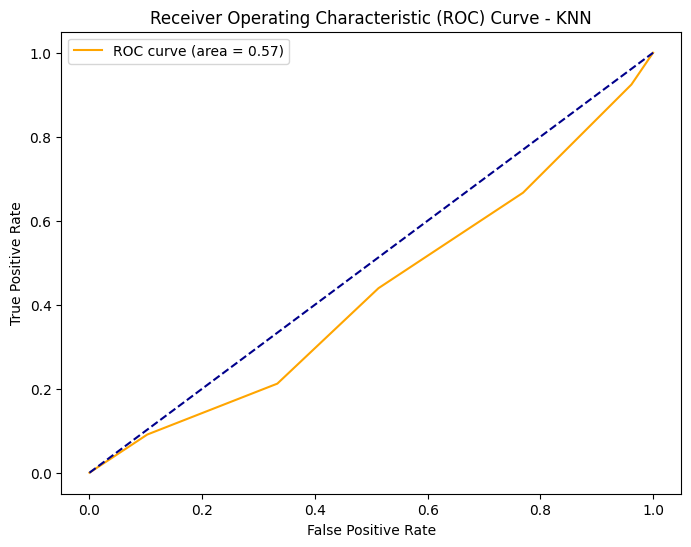

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'completed' is the positive class
pos_label = 'completed'

# Get the probability estimates for the positive class
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn, pos_label=pos_label)
roc_auc = roc_auc_score(y_test, y_probs_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend()
plt.show()

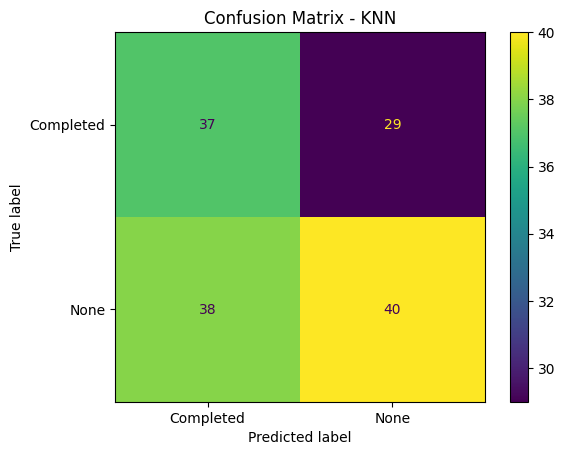

In [62]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Completed','None'])
disp.plot()
plt.title("Confusion Matrix - KNN")
plt.show()